### PS4 - MACSS 30200 Perspectives in Computational Research
#### Monday, May 28, 2018
#### Kevin Sun

In [23]:
import numpy as np
import scipy.stats as sts
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

### 1a) 

In [24]:
T = 500
sigma = 0.7
mu = 11.4
rho = 0.85

# drawing a random uniform distribution
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25) 
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [25]:
# define the z time plus 1 function
def z_t_plus_1(z_t, rho, mu, epsilon):
    z_t1 = rho * z_t + (1 - rho) * mu + epsilon
    return z_t1

In [26]:
z_current = mu
z_t1_vector = np.zeros(T) # create vector of zeroes to store z's as we calculate them

for z_t1_index in range(T):
    z_t1 = z_t_plus_1(z_t=z_current, rho=rho, mu=mu, epsilon=eps_vec[z_t1_index])
    z_t1_vector[z_t1_index] = z_t1
    z_current = z_t1

<IPython.core.display.Javascript object>


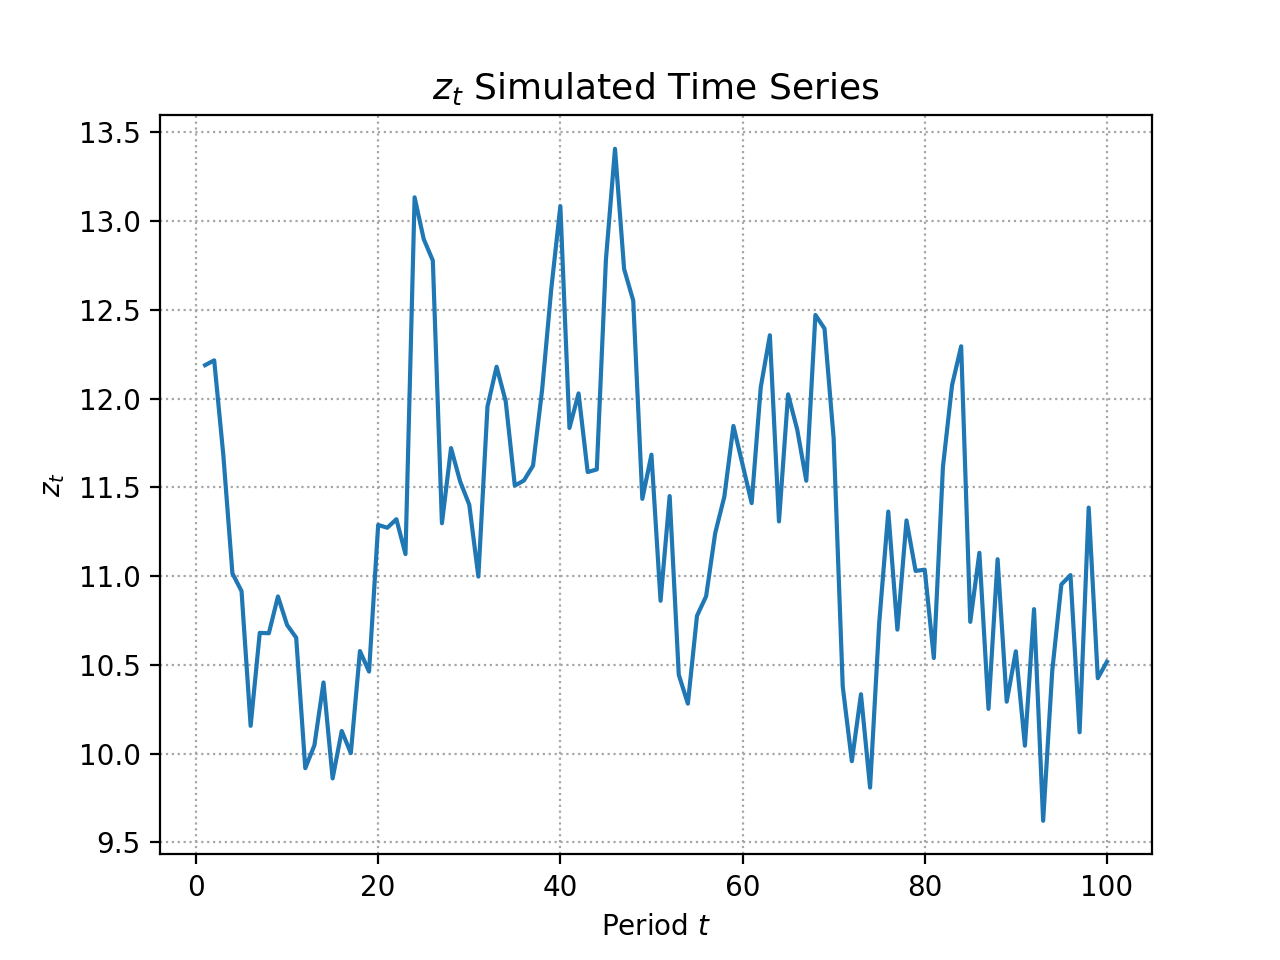

In [27]:
# plot the first 100 observations 
periods = 100
z_t1_vector_100 = z_t1_vector[0:periods]

plt.plot(np.arange(1, periods + 1), z_t1_vector_100, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'$z_t$ Simulated Time Series', fontsize=13)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')

### 1b)

In [28]:
z_t_mean = mu
z_t_std = sigma

z_min = z_t_mean - 3 * z_t_std # min value z can take on
z_low = z_min + ((z_t_mean - z_min) / 2) # 25th percentile value z can take on
z_max = z_t_mean + 3 * z_t_std # max value z can take on
z_high = z_t_mean + ((z_max - z_t_mean) / 2) #75th percentile value z can take on

z_vals = np.array([z_min, z_low, z_t_mean, z_high, z_max])
z_vals

array([  9.3 ,  10.35,  11.4 ,  12.45,  13.5 ])

### 1c)

In [29]:
# z_cuts are midpoints between z_vals in (b)
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([  9.825,  10.875,  11.925,  12.975])

In [30]:
def sort_into_bin(z_value, z_cuts):
    """
    This function sorts the z_value into the appropriate bin.
    """
    if z_value <= z_cuts[0]:
        return 1
    elif (z_cuts[0] < z_value) and (z_value <= z_cuts[1]):
        return 2
    elif (z_cuts[1] < z_value) and (z_value <= z_cuts[2]):
        return 3
    elif (z_cuts[2] < z_value) and (z_value <= z_cuts[3]):
        return 4
    elif (z_value > z_cuts[3]):
        return 5

In [31]:
# create empty vector to store counts
transition_counts = np.zeros(shape=(5, 5), dtype=np.int16)

start_bin_counts = np.zeros(5, dtype=np.int16)

prev_bin_num = None

for i in range(T):
    z_value = z_t1_vector[i]
    
    curr_bin_num = sort_into_bin(z_value=z_value, z_cuts=z_cuts)
    curr_bin_ind = curr_bin_num - 1
    
    if prev_bin_num:
        prev_bin_ind = prev_bin_num - 1
        transition_counts[prev_bin_ind][curr_bin_ind] += 1
    
    start_bin_counts[curr_bin_ind] += 1
        
    prev_bin_num = curr_bin_num

In [34]:
print("Starting Bin Total Counts")
print()
print(start_bin_counts)
print()
print()
print("Transition Matrix Counts")
print()
print(transition_counts)

Starting Bin Total Counts

[ 50 120 163 119  48]


Transition Matrix Counts

[[34 13  2  0  0]
 [11 66 39  4  0]
 [ 5 36 79 37  6]
 [ 0  5 41 60 13]
 [ 0  0  2 17 29]]


In [43]:
# Initialize the estimated P transition matrix:
p_hat_matrix = np.zeros(shape=(5, 5), dtype=np.float32)

In [44]:
# obtain probabilities for each outcome
i = 0
j = 0
for i in range(5):
    for j in range(5):
        denom = start_bin_counts[i]
        numer = transition_counts[i][j]
        p_hat_matrix[i][j] = numer / denom

In [45]:
p_hat_matrix

array([[ 0.68000001,  0.25999999,  0.04      ,  0.        ,  0.        ],
       [ 0.09166667,  0.55000001,  0.32499999,  0.03333334,  0.        ],
       [ 0.03067485,  0.2208589 ,  0.48466256,  0.22699386,  0.03680982],
       [ 0.        ,  0.04201681,  0.34453782,  0.50420171,  0.1092437 ],
       [ 0.        ,  0.        ,  0.04166667,  0.35416666,  0.60416669]], dtype=float32)

### 1d)

In [49]:
# starting vector in bin 3
x_0 = np.array([0, 0, 1, 0, 0])

# calculate probabilities of all states given bin3 as starting point 
probs_given_bin3 = np.dot(LA.matrix_power(p_hat_matrix.T, 3), x_0)
print(x_row_u)
print()

# obtain probability of bin5 specifically
bin5_given_bin3 = probs_given_bin3[5-1]
print("P(Bin5|Bin3) = ", bin5_given_bin3)

[ 0.07250394  0.24577107  0.35714355  0.24263275  0.08021578]

P(Bin5|Bin3) =  0.0802157819271


### 1e)

In [55]:
eig_vals, eig_vec_mat = LA.eig(p_hat_matrix.T)

# round the eigenvalues
eig_vals = np.around(eig_vals, decimals=2)

print("Eigenvalues:")
print(eig_vals)
print()
print("Eigenvectors:")
print(eig_vec_mat)

Eigenvalues:
[ 1.          0.75999999  0.12        0.56999999  0.37      ]

Eigenvectors:
[[ 0.20667441  0.54696763 -0.01777174 -0.49488944 -0.17947128]
 [ 0.49376178  0.49935713  0.3721658   0.37225124  0.68712676]
 [ 0.66687065 -0.0664635  -0.78980196  0.63412464 -0.23814754]
 [ 0.48014385 -0.53996009  0.48468661 -0.07822005 -0.5854097 ]
 [ 0.19552593 -0.39432797 -0.04968433 -0.45637819  0.31020656]]


In [56]:
one_ind = np.argwhere(eig_vals == 1).flatten()
print(one_ind)

[0]


In [58]:
# calculate the long-run Ergodic distribution
eig_vec = eig_vec_mat[:, one_ind] / eig_vec_mat[:, one_ind].sum()
stat_dist = eig_vec
print("The long-run Ergodic distribution of z_t:")
print(stat_dist)

The long-run Ergodic distribution of z_t:
[[ 0.10116337]
 [ 0.24168743]
 [ 0.32642108]
 [ 0.23502171]
 [ 0.0957064 ]]


### 1f)

In [59]:
z_initial = 2
z_0 = z_vals[z_initial]
z_vec = np.zeros(T)
z_t = z_0

In [60]:
unif_vec

array([  8.70124137e-01,   5.82276929e-01,   2.78838941e-01,
         1.85911232e-01,   4.11100128e-01,   1.17375547e-01,
         6.84968744e-01,   4.37611060e-01,   5.56229325e-01,
         3.67080322e-01,   4.02365729e-01,   1.13040701e-01,
         4.47030846e-01,   5.85445117e-01,   1.61985104e-01,
         5.20718788e-01,   3.26051126e-01,   6.99186238e-01,
         3.66394549e-01,   8.36374508e-01,   4.81342943e-01,
         5.16502298e-01,   3.83048128e-01,   9.97540896e-01,
         5.14244488e-01,   5.59053274e-01,   3.44497681e-02,
         7.19930026e-01,   4.21003548e-01,   4.36935125e-01,
         2.81700754e-01,   9.00274338e-01,   6.69612278e-01,
         4.56068750e-01,   2.89804345e-01,   5.25818963e-01,
         5.59242062e-01,   7.45283832e-01,   8.28346254e-01,
         8.23694452e-01,   7.71403199e-02,   6.44862070e-01,
         3.09257586e-01,   5.24253716e-01,   9.58092338e-01,
         8.83200956e-01,   2.95431890e-01,   5.12375988e-01,
         8.87024177e-02,

In [62]:
for i in range(T):
    # Calculate new index and new value
    index = np.argwhere(unif_vec[i] <= np.cumsum(p_hat_matrix[z_initial, :])).min()
    z_plus_1 = z_vals[index]
    z_vec[i] = z_plus_1
    
    # update current value and index
    z_t = z_plus_1
    z_initial = index

<IPython.core.display.Javascript object>


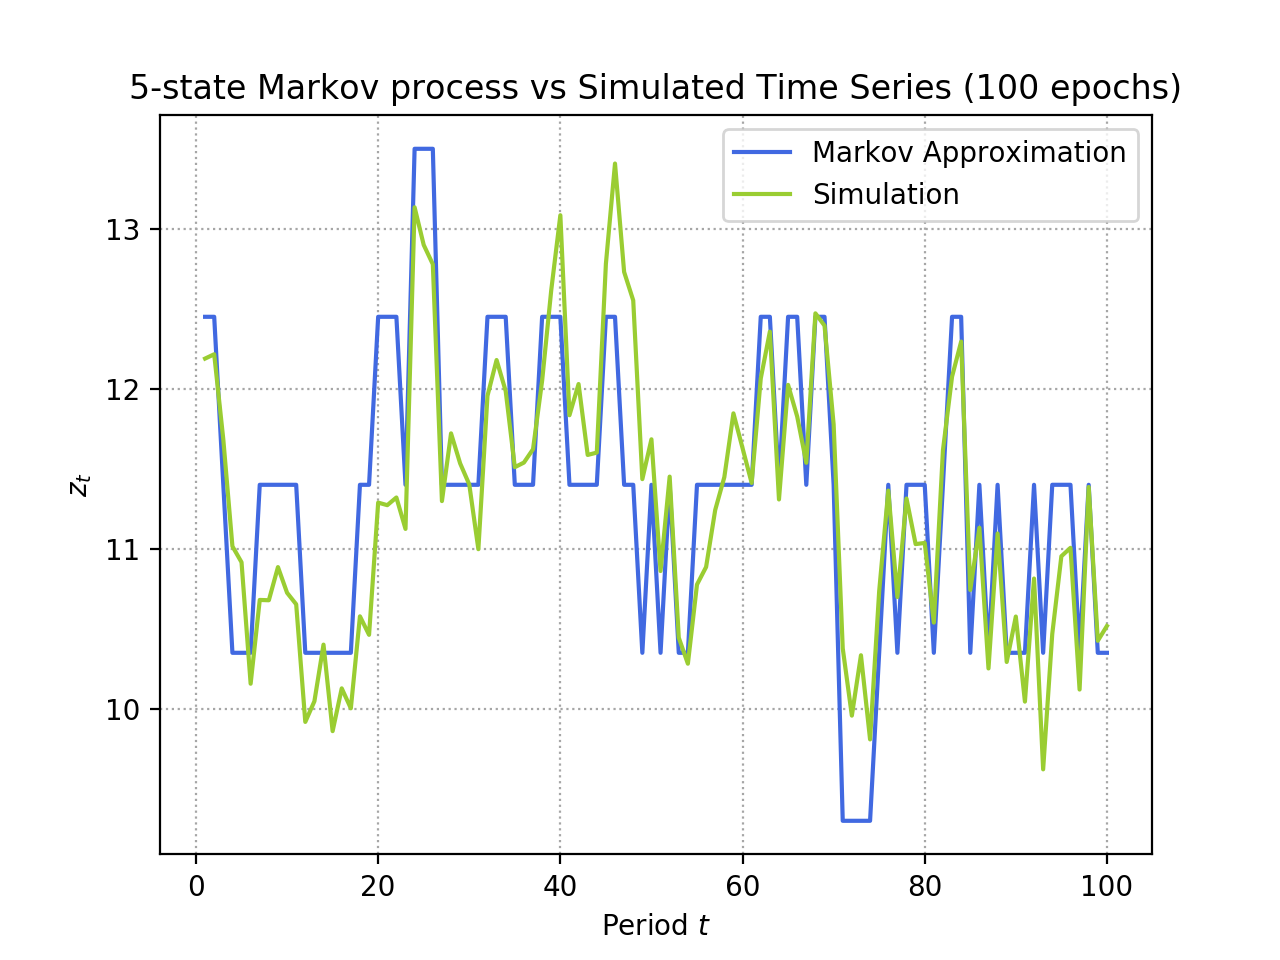

In [71]:
# Plot the time series of z_t (100 epochs)
z_vector_trunc = z_vec[0:periods]
plt.plot(np.arange(1, periods + 1), z_vector_trunc, '-', color='royalblue')
plt.plot(np.arange(1, periods + 1), z_t1_vector_100, '-', color='yellowgreen')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'5-state Markov process vs Simulated Time Series (100 epochs)', fontsize=12)
plt.legend(['Markov Approximation', 'Simulation'])
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')